<a href="https://colab.research.google.com/github/alialthiab/Machine-Learning/blob/Machine-Learning/World_Happiness_Report_Segmentation_Using_K_Means_Clustering_and__ROCK_clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


#2: IMPORT DATASETS AND LIBRARIES

In [4]:
# Get the required dependencies
! pip install --upgrade pip
! pip install bubbly
! pip install iplot
! pip install plotly
! pip install chart_studio
! pip install jupyterthemes
! pip install --upgrade plotly
! pip install tornado

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [11]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
# import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [14]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [15]:
# Import csv file into pandas dataframe
df = pd.read_csv("happiness_report.csv")

In [16]:
# print the first 5 rows of the dataframe
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


- Find out how many samples exist in the DataFrame using two different methods.
- Select your own country from the dataframe and explore scores. Perform sanity check. 

In [17]:
len(df)

156

In [18]:
df.shape

(156, 9)

In [19]:
df[df['Country or region'] == 'Cyprus']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
48,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.19,0.041


#3: PERFORM EXPLORATORY DATA ANALYSIS

In [20]:
# Check the number of non-null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [21]:
# Check Null values
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [22]:
# Obtain the Statistical summary of the dataframe
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [24]:
# check the number of duplicated entries in the dataframe
 # since there are no duplicates, no further action is required
  
df.duplicated().sum()

0

- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [25]:
df[df.Score == df.Score.max() ]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


# TASK #4: PERFORM DATA VISUALIZATION - PART #1

'\n\n'

<Figure size 1440x1440 with 0 Axes>

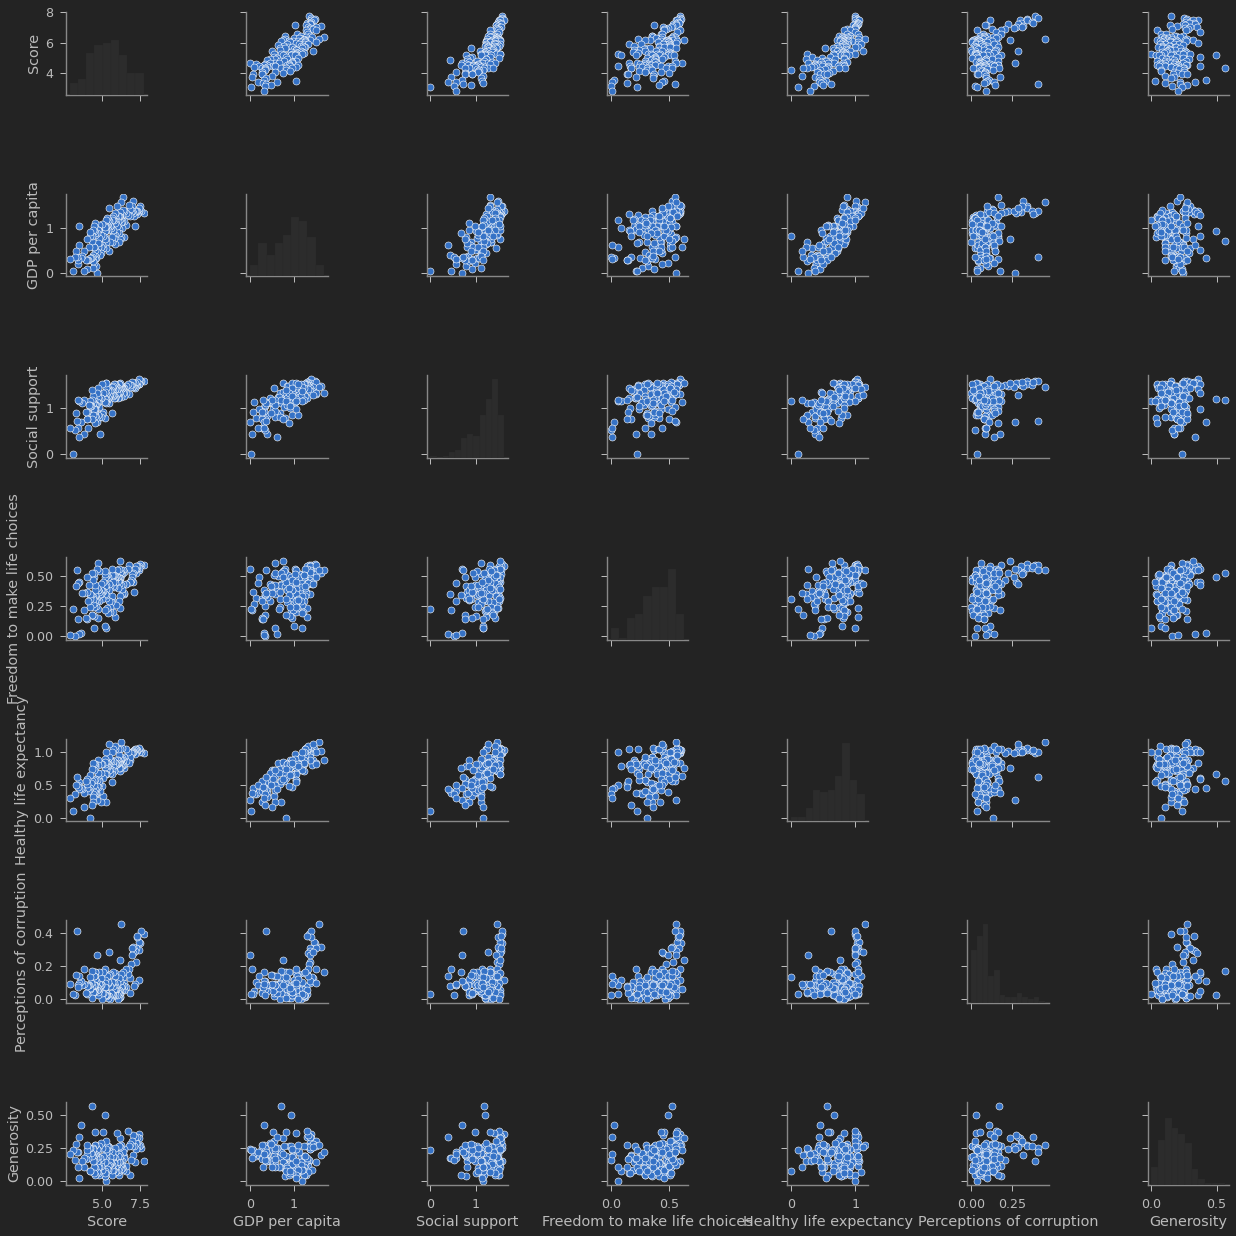

In [26]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
sns.pairplot(df[['Score', 'GDP per capita', 'Social support',
                 'Freedom to make life choices', 'Healthy life expectancy',
                 'Perceptions of corruption' ,'Generosity', ]])
# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 
'''

'''

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

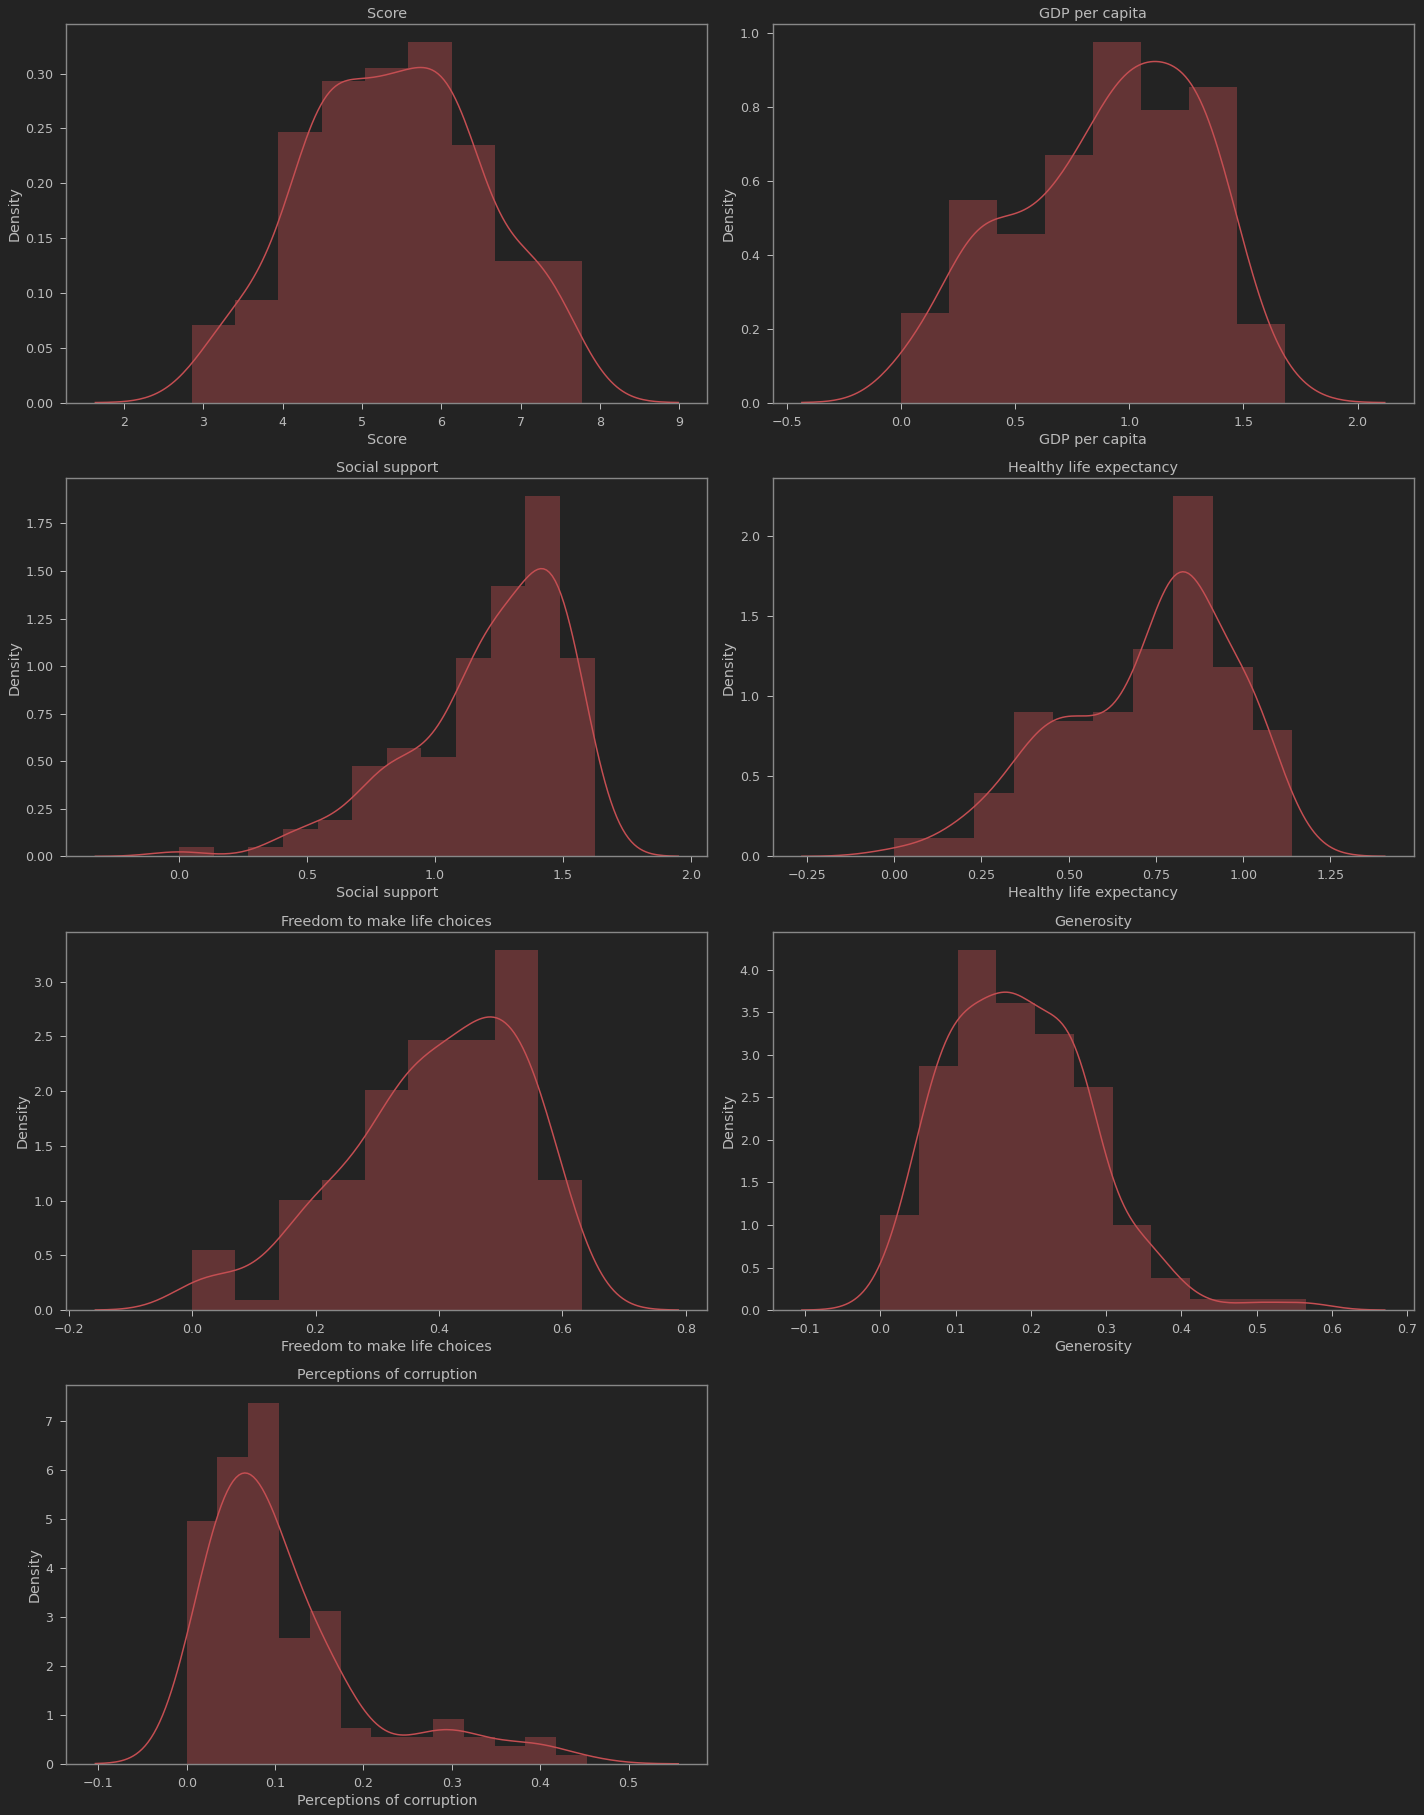

In [27]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(df[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

- Plot the correlation matrix and comment on the results. 


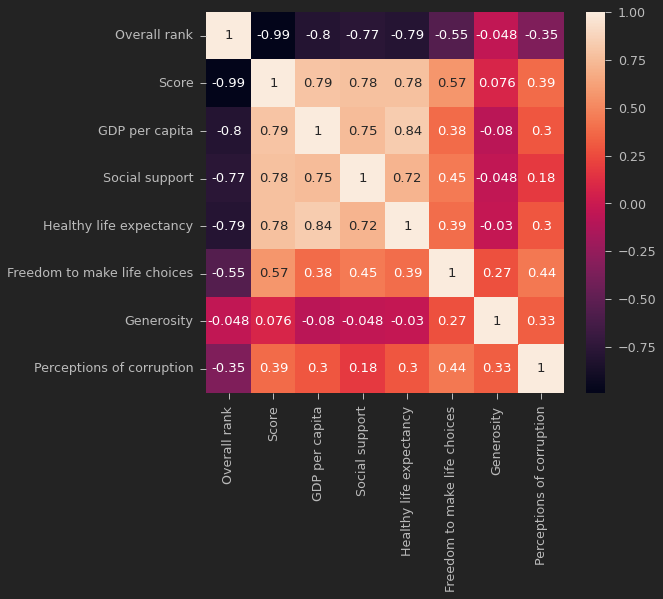

In [28]:
corr = df.corr()
sns.heatmap(corr,
            #cmap='coolwarm',
            annot=True,)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#5: PERFORM DATA VISUALIZATION - PART #2

In [32]:
# Plot the relationship between score, GDP and region
# plt.subplot(1,2,1)
# sns.scatterplot(x=df['C'], y=df['Country or region'])
# plt.subplot(1,2,2)
# sns.scatterplot(x=df['GDP per capita'], y=df['Country or region'])

fig = ploty.express.scatter(df, x='GDP per capita', y='Score',
      text='Country or region'
)
fig.show()



NameError: ignored

In [ ]:
# Plot the relationship between score and GDP (while adding color and size)
fig = px.scatter(df, x='GDP per capita', y='Score',
      text='Country or region', size='Overall rank',
       color='Country or region'
)

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [ ]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(df, x = 'Freedom to make life choices', 
                 y = "Score", size = 'Overall rank',
                 color = "Country or region",
                 hover_name = "Country or region",trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

MINI CHALLENGE #4: 
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

In [ ]:
fig = px.scatter(df, x='Healthy life expectancy', y='Score',
      text='Country or region'
)
fig.show()

In [ ]:
fig = px.scatter(df,  x='Healthy life expectancy', y='Score',
      text='Country or region', size='Overall rank',
       color='Country or region'
)

fig.update_layout(title_text ='Healthy life expectancy vs GDP per Capita')
fig.show()

In [ ]:
fig = px.scatter(df, x='Healthy life expectancy'
                , y = "Score", size = 'Overall rank',
                color = "Country or region", 
                 hover_name = "Country or region", trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Healthy life expectancy')
fig.show()

# TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [ ]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [ ]:
# Select the data without rank and happiness score
df_features = df.drop(columns=['Score','Overall rank','Country or region'])
df_features

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

In [ ]:
scaled_data.shape

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS CLUSTERING ALGORITHM

# TASK #8: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
'''
OverflowError: cannot convert float infinity to integer
'''

ALOT = 1e6
vals = [(max(min(x, ALOT), -ALOT)) for x in scaled_data[scaled_data.all().values]]

'''
********
'''
vals

In [ ]:
scores = []

for i in range(21):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_data)
  scores.append(kmeans.inertia_) 

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve. 
# Let's choose the number of clusters to be 3.

# TASK #9: APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(3)
kmeans.fit(scaled_data)

In [ ]:
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
kmeans.cluster_centers_

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_features.columns])
cluster_centers      

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_features.columns])
cluster_centers


- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [ ]:
labels.shape # Labels associated to each data point

In [ ]:
labels.max()

In [ ]:
labels.min()

In [ ]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


In [ ]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster

In [ ]:
# Plot the histogram of various clusters
for i in df_features.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



MINI CHALLENGE #5:
- Try the same model with 4 clusters 

In [ ]:
kmeans = KMeans(4)
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(4, 6)

In [ ]:
kmeans.cluster_centers_

array([[ 1.22942147,  0.96509868,  1.12091495,  1.11717735,  0.94567129,
         1.88396072],
       [ 0.40668456,  0.33113646,  0.41575468, -0.19917063, -0.83008434,
        -0.40605263],
       [-1.322925  , -1.22937995, -1.37828101, -0.64496852,  0.18329746,
        -0.12922639],
       [-0.01947479,  0.22135024,  0.11886404,  0.48851483,  0.89030396,
        -0.34085032]])

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_features.columns])
cluster_centers      

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.229421,0.965099,1.120915,1.117177,0.945671,1.883961
1,0.406685,0.331136,0.415755,-0.199171,-0.830084,-0.406053
2,-1.322925,-1.229380,-1.378281,-0.644969,0.183297,-0.129226
3,-0.019475,0.221350,0.118864,0.488515,0.890304,-0.340850


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_features.columns])
cluster_centers


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.393364,1.496636,0.995773,0.552136,0.274636,0.288136
1,1.066646,1.307569,0.825585,0.364123,0.106031,0.072338
2,0.379800,0.842175,0.392600,0.300450,0.202250,0.098425
3,0.897414,1.274828,0.753931,0.462345,0.269379,0.078483


- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [ ]:
labels.shape # Labels associated to each data point

(156,)

In [ ]:
labels.max()

3

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0,
       3, 3, 1, 3, 1, 3, 0, 3, 3, 3, 3, 0, 3, 3, 1, 3, 1, 3, 0, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 1, 3,
       3, 3, 3, 1, 3, 1, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3,
       2, 2, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2


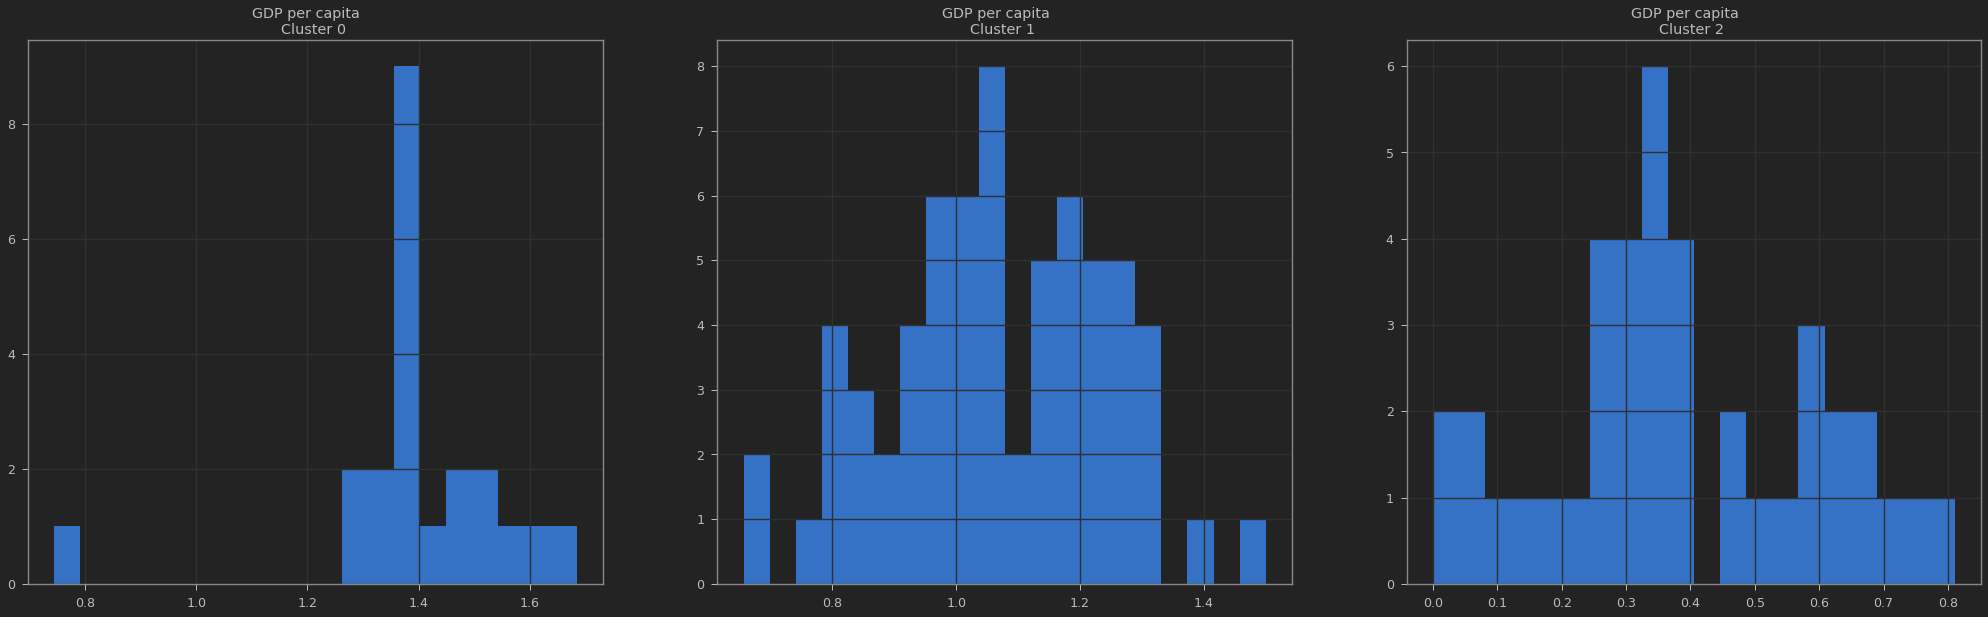

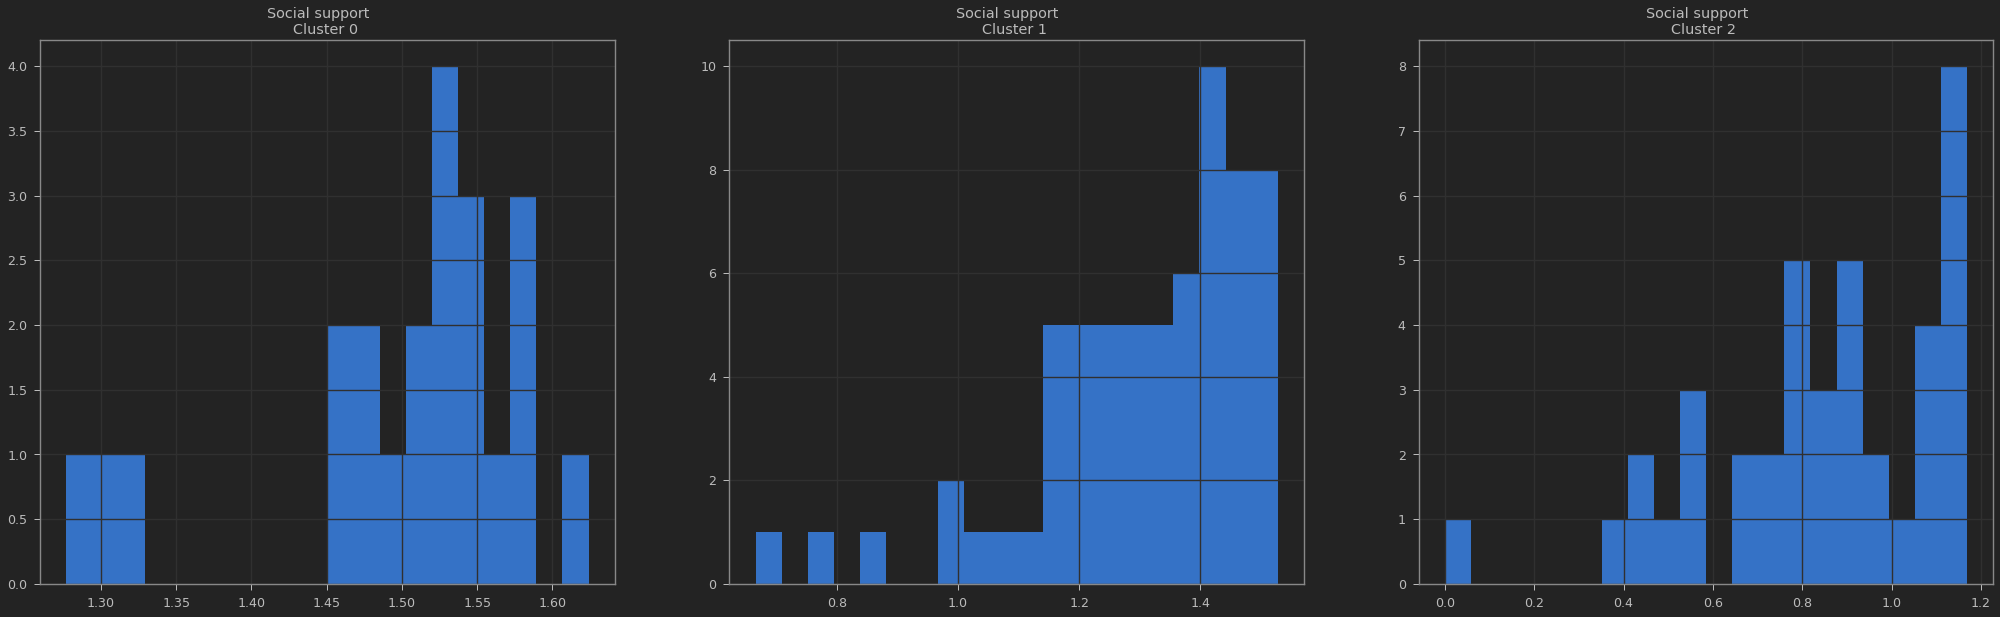

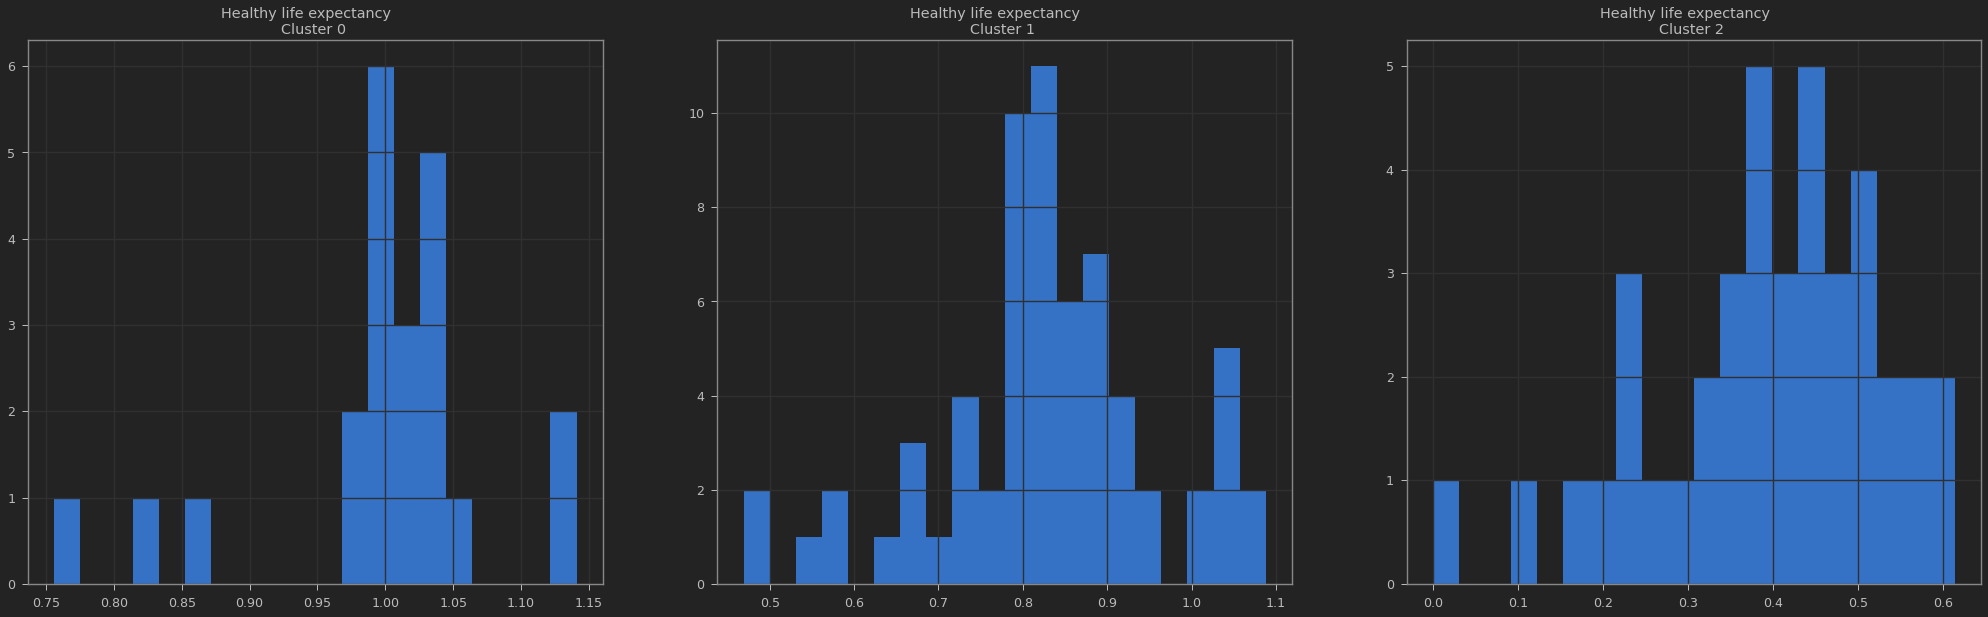

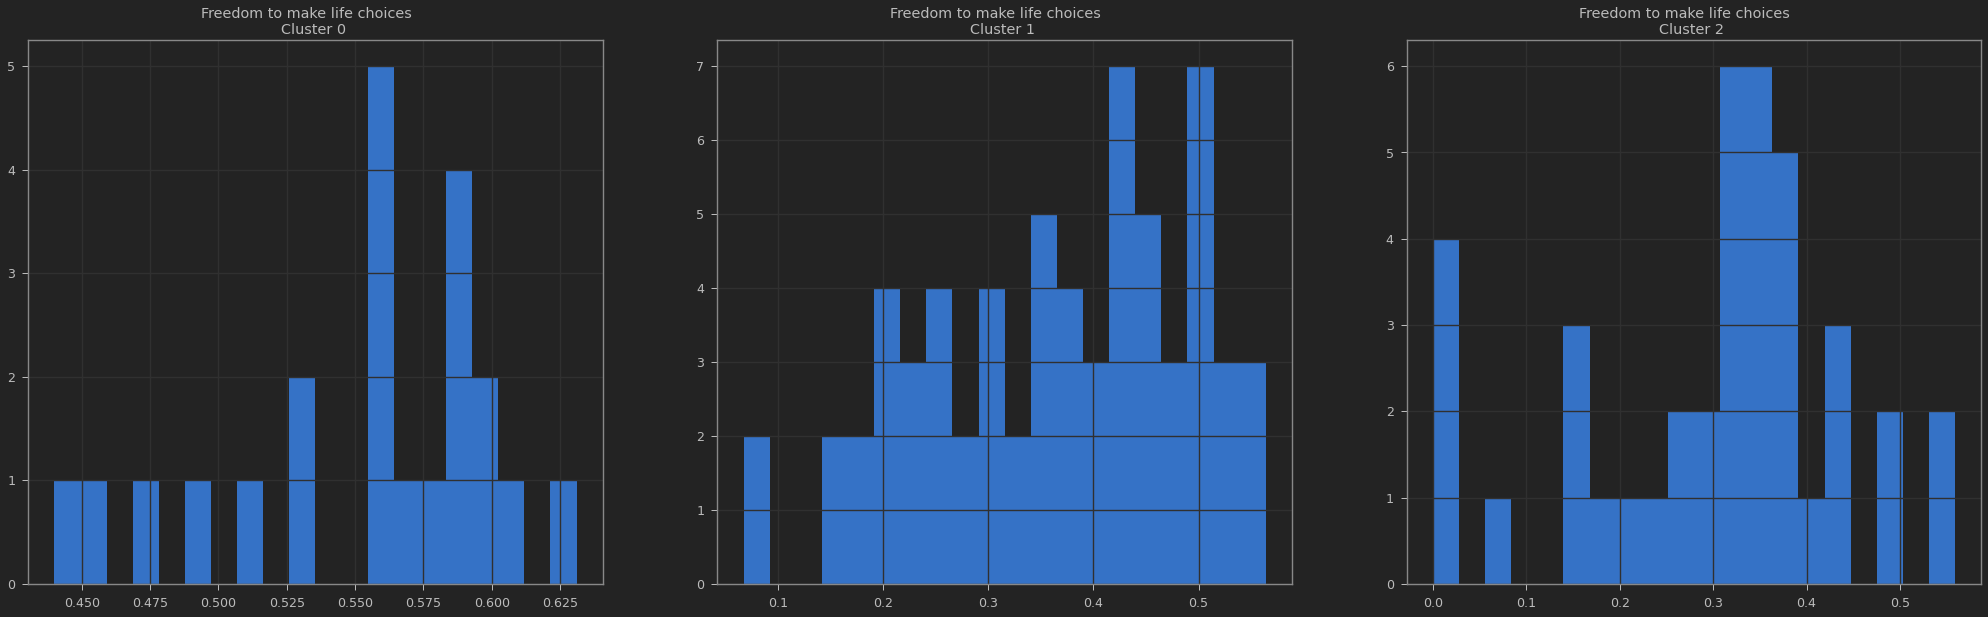

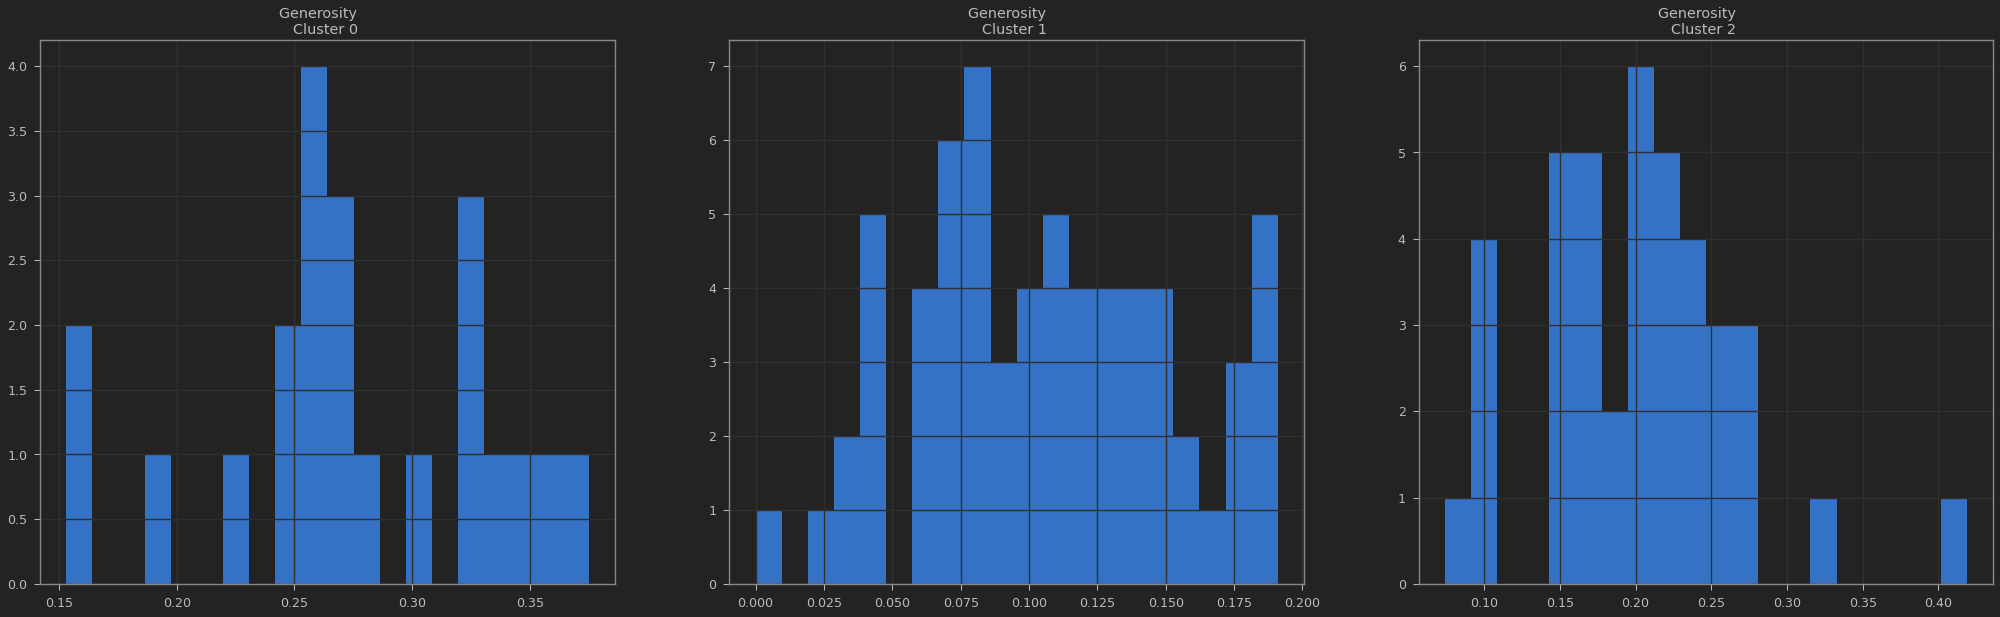

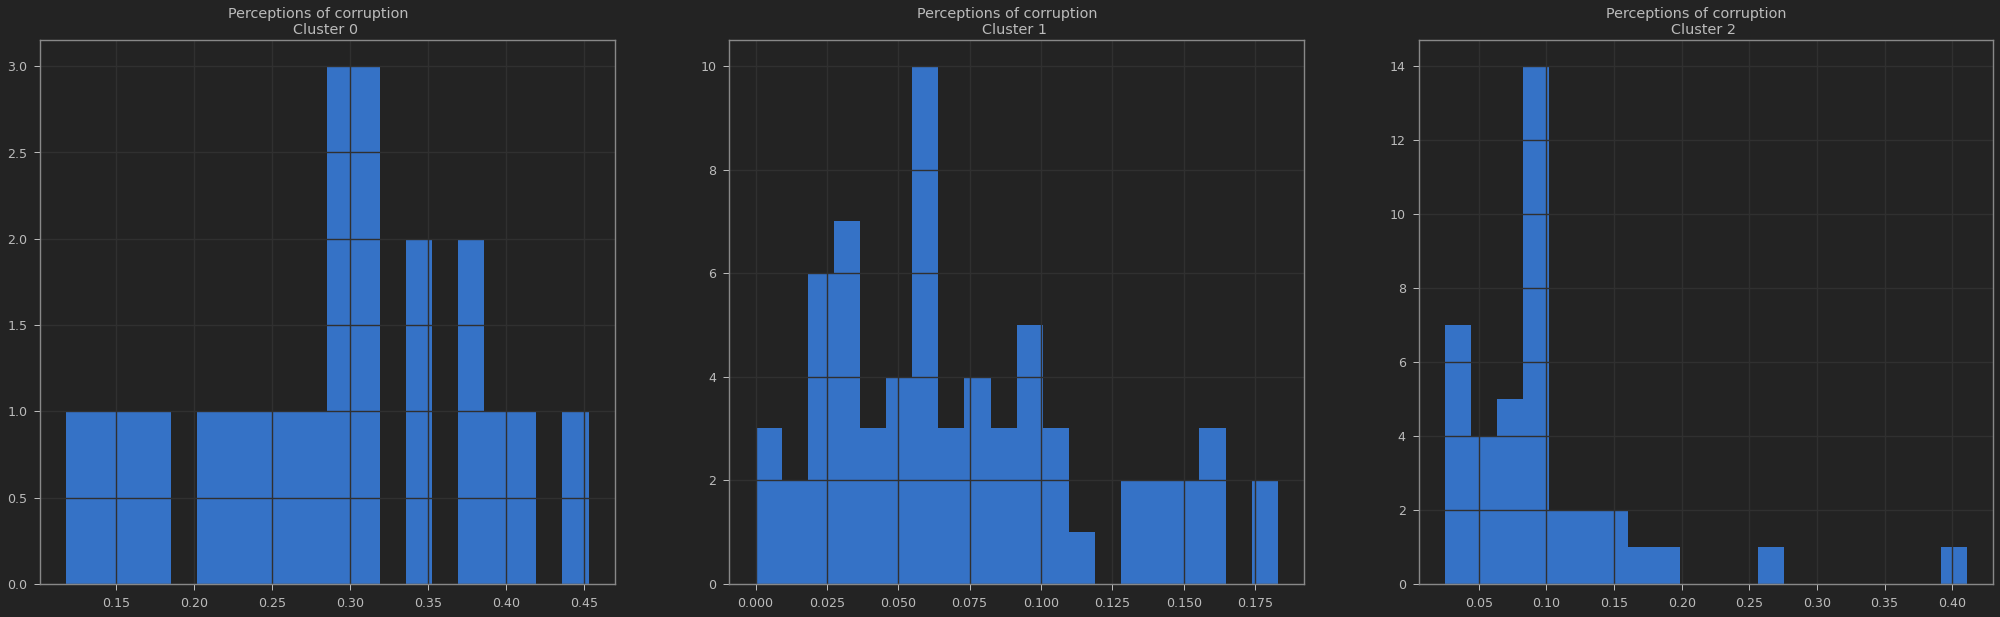

In [ ]:
# Plot the histogram of various clusters
for i in df_features.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



# TASK #10: VISUALIZE THE CLUSTERS

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2


# TASK #9: APPLY K-MEANS METHOD

In [ ]:
df_cluster

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2


In [ ]:
# Plot the relationship between cluster and score 

fig = px.scatter(df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [ ]:
# Plot the relationship between cluster and GDP

fig = px.scatter(df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [ ]:
# Visaulizing the clusters with respect to economy, corruption, gdp, rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Healthy life expectancy', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:160: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



MINI CHALLENGE #6:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [ ]:


figure = bubbleplot(dataset=df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Generosity', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:160: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [ ]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df_cluster['cluster'], 
           text = df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# The End